Fitted parameters:  [9.47608756 0.27568485]
Parameter uncertainties:  [0.01924455 0.00052198]


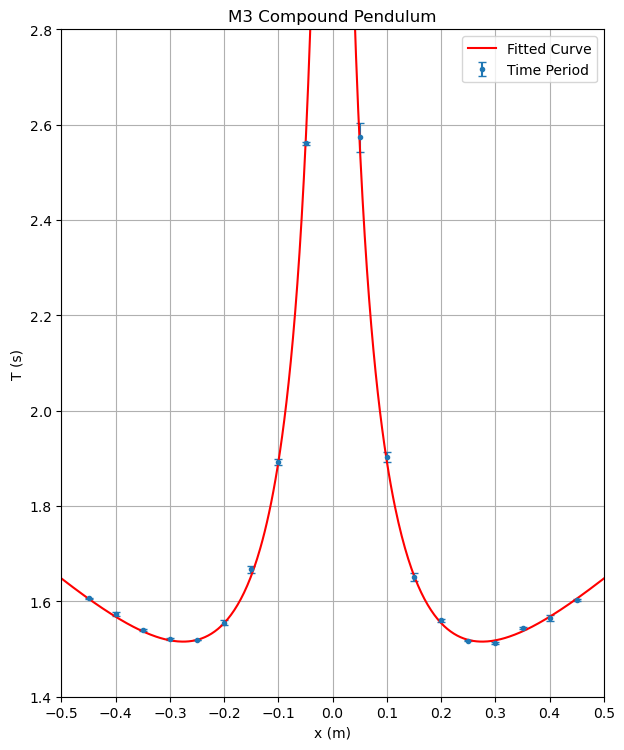

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from io import StringIO

string_data = """
x,T1,T2,T3
-45,48.18,48.25,48.15
-40,47.19,47.31,47.10
-35,46.25,46.16,46.19
-30,45.60,45.71,45.63
-25,45.54,45.56,45.57
-20,46.60,46.56,46.82
-15,49.91,49.88,50.25
-10,56.81,56.59,56.94
-5,76.84,76.93,76.72
5,76.13,77.68,77.78
10,56.96,56.90,57.44
15,49.56,49.78,49.25
20,46.72,46.87,46.87
25,45.53,45.50,45.56
30,45.44,45.41,45.31
35,46.37,46.28,46.25
40,47.16,46.90,46.84
45,48.13,48.09,48.00
"""

# Load data from string table (row 1 is header)
data = np.genfromtxt(StringIO(string_data), delimiter=',', skip_header=2, dtype=np.float64)

# Length (m)
x_data = data[:, 0]/100

# Time Period of Single oscillation (s)
y_raw_data = data[:, 1:]/30

y_data = y_raw_data.mean(axis=1)
y_errors = y_raw_data.std(axis=1, ddof=1)

#print(data)
#print(y_data)
#print(y_errors)

def model(x, g, k):
    return 2 * np.pi * np.sqrt((k**2 + x**2)/(np.abs(x) * g))

popt, pcov = curve_fit(model, x_data, y_data, sigma=y_errors, absolute_sigma=True)

print("Fitted parameters: ", popt)
print("Parameter uncertainties: ", np.sqrt(np.diag(pcov)))

plt.figure(figsize=(7,7*(26/21)))

plt.errorbar(x_data, y_data, yerr=y_errors, fmt='.', label="Time Period", capsize=3)

x_fine = np.linspace(-0.50, 0.50, 500)
plt.plot(x_fine, model(x_fine, *popt), 'r-', label="Fitted Curve")
plt.xlim(-0.50, 0.50)
plt.ylim(1.4, 2.8)
plt.xticks(np.linspace(-0.50, 0.50, 11))

plt.title('M3 Compound Pendulum')
plt.xlabel('x (m)')
plt.ylabel('T (s)')
plt.legend()
plt.grid()
plt.show()